In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks"

Cataract_Dataset	     modified_data_2000.zip
CNN_CataractDetection.ipynb  Untitled0.ipynb


In [0]:
!pwd

/content


In [5]:
# Importing Libraries
from tensorflow import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import glob 
import numpy as np
from os import listdir,makedirs
from os.path import isfile,join
from numpy import *
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random
import cv2
import os 

Using TensorFlow backend.


In [0]:
# path to dataset
path_2="/content/drive/My Drive/Colab Notebooks/Cataract_Dataset"

In [7]:
IMG_SIZE=300

def label_img(name):
	if name[0:2]=="no":
		return np.array([1,0])
	elif name[0:2]=="ca":
		return np.array([0,1])

def load_training_data(arg):
	train_data=[]
	DIR=path_2+"/"+arg
	for img in os.listdir(DIR):
		label=label_img(img)
		path=os.path.join(DIR,img)
		img=Image.open(path)
		img=img.convert('L')
		img.resize((IMG_SIZE,IMG_SIZE),Image.ANTIALIAS)
		train_data.append([np.array(img),label])
	shuffle(train_data)
	return train_data
a=load_training_data("Normal")
print("Normal Eyes image loaded!!")
b=load_training_data("Cataract")
print("Cataract Eyes image loaded!!")

Normal Eyes image loaded!!
Cataract Eyes image loaded!!


In [8]:
# preparing training data
print(len(a),len(b))
train_data=[]
# shuffle(a)
for i in range(len(a)):
	train_data.append(a[i])
# shuffle(train_data)
for i in range(len(b)):
	train_data.append(b[i])
shuffle(train_data)
print(len(train_data))

2000 2000
4000


In [9]:
print(len(train_data))
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

4000


In [10]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization

# IMG_SIZE=300
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1),kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print("compile Done!! ")
model.summary()

compile Done!! 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71

In [0]:
# Spliting dataset into training and testing
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(trainImages, trainLabels, test_size=0.125,random_state=1234)

In [15]:
# Fitting the model 
history = model.fit(trainX, trainY,
                    batch_size=10,
                    epochs=100,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(testX,testY),verbose=1)

Train on 3500 samples, validate on 500 samples
Epoch 1/100
3500/3500 [==============================] - 24s 7ms/step - loss: 4.8354 - accuracy: 0.6323 - val_loss: 2.8570 - val_accuracy: 0.5780
Epoch 2/100
3500/3500 [==============================] - 16s 4ms/step - loss: 1.6030 - accuracy: 0.7220 - val_loss: 1.1424 - val_accuracy: 0.7540
Epoch 3/100
3500/3500 [==============================] - 16s 4ms/step - loss: 0.9504 - accuracy: 0.7466 - val_loss: 1.0928 - val_accuracy: 0.4920
Epoch 4/100
3500/3500 [==============================] - 16s 4ms/step - loss: 0.7956 - accuracy: 0.7411 - val_loss: 1.2760 - val_accuracy: 0.4920
Epoch 5/100
3500/3500 [==============================] - 16s 4ms/step - loss: 0.7674 - accuracy: 0.7329 - val_loss: 0.7441 - val_accuracy: 0.7100
Epoch 6/100
3500/3500 [==============================] - 16s 4ms/step - loss: 0.7081 - accuracy: 0.7483 - val_loss: 1.5225 - val_accuracy: 0.4920
Epoch 7/100
3500/3500 [==============================] - 16s 4ms/step - loss:

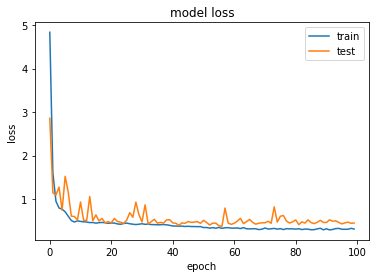

In [23]:
# Ploting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

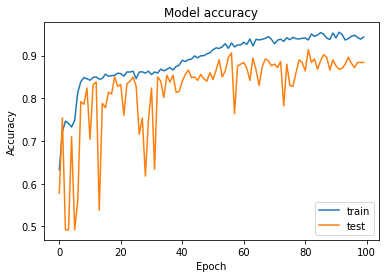

In [24]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [22]:
model.evaluate(testX, testY)[1]

500/500 [==============================] - 2s 3ms/step


0.8840000033378601